## Importing Libraries

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from timm import create_model
import tqdm
import time
from torch.utils.tensorboard import SummaryWriter
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, top_k_accuracy_score
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

C:\Users\offic\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Preprocessing and Augmentation 

In [2]:
# Define data transformations with augmentation for train set
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
    transforms.RandomCrop(224, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Transformations for validation and test sets
val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Dataset and DataLoader
dataset_dir = "C:\\Users\\offic\\OneDrive\\Masaüstü\\datasets\\road_sign_dataset"

# Load datasets from already split folders
train_dataset = datasets.ImageFolder(root=os.path.join(dataset_dir, 'train'), transform=train_transform)
val_dataset = datasets.ImageFolder(root=os.path.join(dataset_dir, 'val'), transform=val_test_transform)
test_dataset = datasets.ImageFolder(root=os.path.join(dataset_dir, 'test'), transform=val_test_transform)

# Create data loaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

## Model Setup

In [3]:
# Create ConvNeXt v2 model
model = create_model('convnextv2_tiny', pretrained=True, num_classes=9)
model.to(device)


ConvNeXt(
  (stem): Sequential(
    (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
    (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
  )
  (stages): Sequential(
    (0): ConvNeXtStage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): ConvNeXtBlock(
          (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (mlp): GlobalResponseNormMlp(
            (fc1): Linear(in_features=96, out_features=384, bias=True)
            (act): GELU()
            (drop1): Dropout(p=0.0, inplace=False)
            (grn): GlobalResponseNorm()
            (fc2): Linear(in_features=384, out_features=96, bias=True)
            (drop2): Dropout(p=0.0, inplace=False)
          )
          (shortcut): Identity()
          (drop_path): Identity()
        )
        (1): ConvNeXtBlock(
          (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), 

## Training the model with Fine-tuning

Epoch 1/20: 100%|██████████| 69/69 [20:48<00:00, 18.10s/batch, Train Loss=1, Train Accuracy=64.8]    


Epoch 1/20, Train Loss: 1.0007, Train Accuracy: 64.81%, Val Loss: 0.2395, Val Accuracy: 92.14%


Epoch 2/20: 100%|██████████| 69/69 [19:28<00:00, 16.93s/batch, Train Loss=0.0846, Train Accuracy=97.5]


Epoch 2/20, Train Loss: 0.0846, Train Accuracy: 97.49%, Val Loss: 0.0752, Val Accuracy: 97.86%


Epoch 3/20: 100%|██████████| 69/69 [19:36<00:00, 17.05s/batch, Train Loss=0.0402, Train Accuracy=98.9] 


Epoch 3/20, Train Loss: 0.0402, Train Accuracy: 98.86%, Val Loss: 0.0392, Val Accuracy: 98.81%


Epoch 4/20: 100%|██████████| 69/69 [19:33<00:00, 17.01s/batch, Train Loss=0.0333, Train Accuracy=99.1] 


Epoch 4/20, Train Loss: 0.0333, Train Accuracy: 99.09%, Val Loss: 0.0639, Val Accuracy: 98.33%


Epoch 5/20: 100%|██████████| 69/69 [19:19<00:00, 16.80s/batch, Train Loss=0.0271, Train Accuracy=99.2] 


Epoch 5/20, Train Loss: 0.0271, Train Accuracy: 99.23%, Val Loss: 0.0145, Val Accuracy: 99.76%


Epoch 6/20: 100%|██████████| 69/69 [19:17<00:00, 16.78s/batch, Train Loss=0.0182, Train Accuracy=99.5] 


Epoch 6/20, Train Loss: 0.0182, Train Accuracy: 99.45%, Val Loss: 0.0513, Val Accuracy: 98.81%


Epoch 7/20: 100%|██████████| 69/69 [19:34<00:00, 17.03s/batch, Train Loss=0.0315, Train Accuracy=99.4] 


Epoch 7/20, Train Loss: 0.0315, Train Accuracy: 99.36%, Val Loss: 0.0212, Val Accuracy: 99.05%


Epoch 8/20: 100%|██████████| 69/69 [21:09<00:00, 18.40s/batch, Train Loss=0.038, Train Accuracy=98.9]  


Epoch 8/20, Train Loss: 0.0380, Train Accuracy: 98.86%, Val Loss: 0.0461, Val Accuracy: 98.81%


Epoch 9/20: 100%|██████████| 69/69 [21:42<00:00, 18.87s/batch, Train Loss=0.0575, Train Accuracy=98]   


Epoch 9/20, Train Loss: 0.0575, Train Accuracy: 97.99%, Val Loss: 0.0282, Val Accuracy: 98.81%


Epoch 10/20: 100%|██████████| 69/69 [19:17<00:00, 16.77s/batch, Train Loss=0.019, Train Accuracy=99.5]  


Epoch 10/20, Train Loss: 0.0190, Train Accuracy: 99.45%, Val Loss: 0.0252, Val Accuracy: 99.29%
Early stopping triggered after 10 epochs


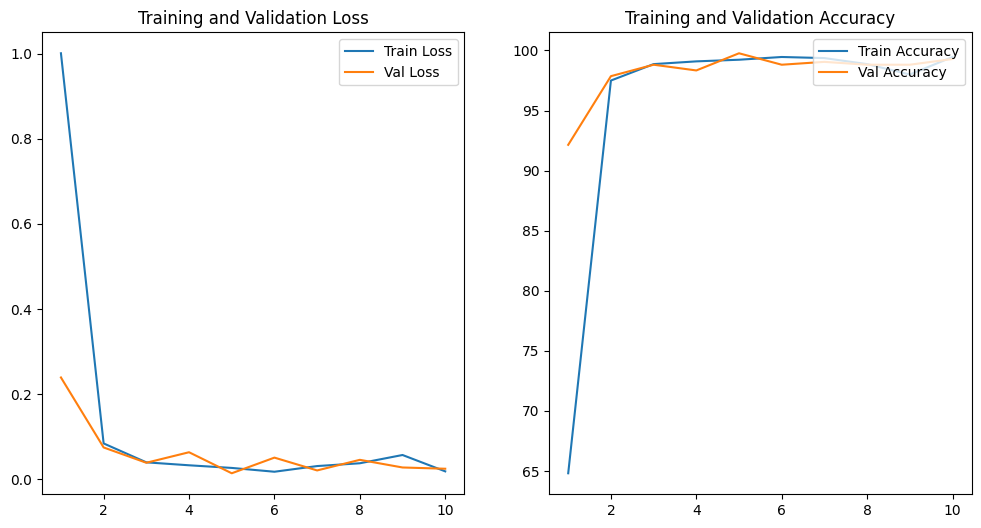

In [4]:
import matplotlib.pyplot as plt

# Define optimizer with learning rate
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# ReduceLROnPlateau scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

# Loss function
criterion = nn.CrossEntropyLoss()

def train(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20, early_stop_patience=5):
    best_val_loss = float('inf')
    patience = 0
    
    # Lists to store metrics for plotting
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        # Progress bar for training
        train_progress = tqdm.tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch")
        
        for images, labels in train_progress:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

            # Update progress bar with current metrics
            train_progress.set_postfix({
                "Train Loss": running_loss / len(train_loader),
                "Train Accuracy": 100 * correct_train / total_train
            })
        
        scheduler.step(running_loss / len(train_loader))

        # Validation phase
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        model.eval()
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_accuracy = 100 * correct_val / total_val
        avg_train_loss = running_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        train_accuracy = 100 * correct_train / total_train
        
        # Store metrics
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        # Print metrics after each epoch
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
              f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

        # Early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience = 0
            # Save the model state
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience += 1
            if patience >= early_stop_patience:
                print(f"Early stopping triggered after {epoch+1} epochs")
                break

    # Plotting the results
    epochs_range = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))
    
    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Train Loss')
    plt.plot(epochs_range, val_losses, label='Val Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Val Accuracy')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Accuracy')

    plt.show()

# Train the model
train(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20, early_stop_patience=5)


## Model Evaluation

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        22

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



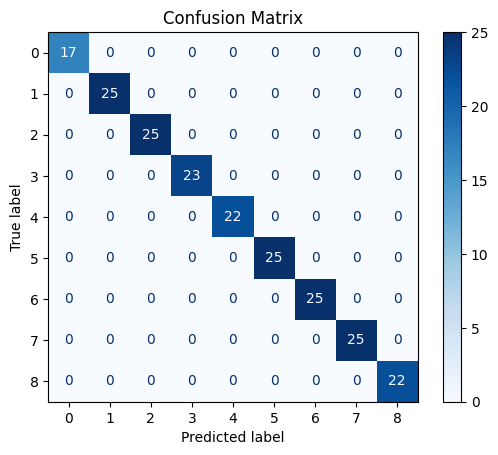

In [9]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import torch
import matplotlib.pyplot as plt

# Function to evaluate the model and output all necessary metrics
def evaluate(model, test_loader, class_names):
    model.eval()  # Set model to evaluation mode
    y_true = []
    y_pred = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            # Get model outputs
            outputs = model(images)
            _, preds = torch.max(outputs, 1)  # Get predicted classes
            
            # Store true labels and predicted classes
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    # Convert lists to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Classification report
    report = classification_report(y_true, y_pred, target_names=class_names)
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# List of class names (replace with your actual class names if needed)
class_names = test_loader.dataset.classes

# Load the best model and evaluate
model.load_state_dict(torch.load('best_model.pth'))
evaluate(model, test_loader, class_names)
